In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from keras import layers
from keras import models
from keras.layers import Dropout

# A

In [2]:
#original_dataset_dir = "C:/sers/Lenovo/Desktop/AI(HW)/Sina_Soleimani/2/SceneClassificationData"
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "./SceneClassificationData/seg_train/",
    target_size= (60, 60),
    batch_size=20,
    color_mode='rgb',
    class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
    'SceneClassificationData/seg_validation',
    target_size=(60, 60),
    batch_size=20,
    color_mode='rgb',
    class_mode='categorical'
)





val_generator = val_datagen.flow_from_directory(
    'SceneClassificationData/seg_validation',
    target_size=(60, 60),
    batch_size=20,
    color_mode='rgb',
    class_mode='categorical'
)




pred_generator = pred_datagen.flow_from_directory(
    'SceneClassificationData/seg_pred',
    target_size=(60, 60),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [3]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 60, 60, 3)
labels batch shape: (20, 6)


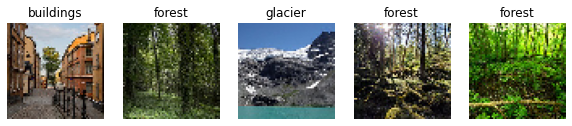

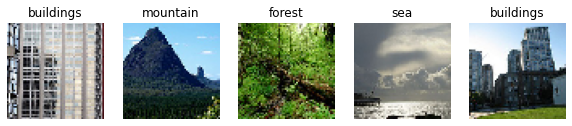

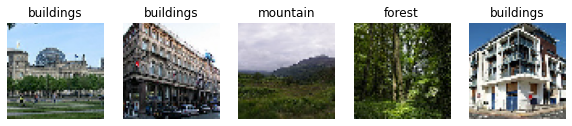

In [38]:
import matplotlib.pyplot as plt

# Show images from the train generator
def show_images(generator, num_images=5):
    # Get a batch of images and labels
    images, labels = next(generator)
    # Get the class labels
    class_labels = list(generator.class_indices.keys())

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i].argmax()])
        plt.axis('off')
    plt.show()

# Show images from the train generator
show_images(train_generator)

# Show images from the validation generator
show_images(val_generator)

# Show images from the test generator
show_images(test_generator)


# B

In [4]:
def CNN():
   
    model = models.Sequential()
   
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(60,60,3)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    ## adding a classifier on top of the convent
    model.add(layers.Flatten())   #to vector
    model.add(layers.Dense(512, activation='relu'))   
    model.add(Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax')) #number of class 


    # Compilation
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['acc'])
    return model

In [5]:
model = CNN()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0

In [6]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=50)
model.save('history.h5')

Epoch 1/30


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\3883227226.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 11s 104ms/step - loss: 1.5723 - acc: 0.3145 - val_loss: 1.4558 - val_acc: 0.4280
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 1.3293 - acc: 0.4330 - val_loss: 1.3248 - val_acc: 0.4360
Epoch 3/30
100/100 [==============================] - 10s 96ms/step - loss: 1.2069 - acc: 0.5135 - val_loss: 1.1968 - val_acc: 0.4860
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 1.1219 - acc: 0.5491 - val_loss: 0.9793 - val_acc: 0.5850
Epoch 5/30
100/100 [==============================] - 9s 93ms/step - loss: 1.0709 - acc: 0.5695 - val_loss: 0.9953 - val_acc: 0.6280
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 1.0299 - acc: 0.5890 - val_loss: 0.9269 - val_acc: 0.6550
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 1.0070 - acc: 0.6190 - val_loss: 0.8614 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 9s 93ms/step - loss: 0.

# C

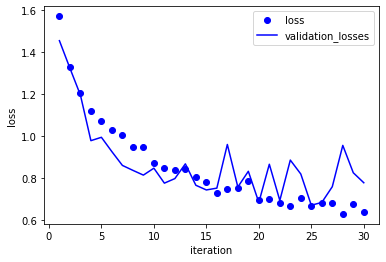

In [7]:
# Plot Losses VS Iteration
history_dict = history.history
epochs = range(1,len(history_dict['loss'])+1)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(epochs,history_dict['loss'],'bo',label = "loss")
plt.plot(epochs,history_dict['val_loss'],'b',label = "validation_losses")
plt.legend()
plt.show()

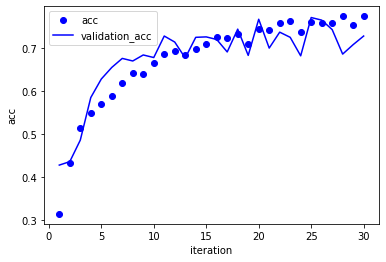

In [8]:
# Plot acc VS Iteration
epochs = range(1,len(history_dict['acc'])+1)
plt.xlabel('iteration')
plt.ylabel('acc')
plt.plot(epochs,history_dict['acc'],'bo',label = "acc")
plt.plot(epochs, history_dict['val_acc'],'b',label = "validation_acc")
plt.legend()
plt.show()

In [9]:
loss, acc= model.evaluate(test_generator)

150/150 [==============================] - 5s 31ms/step - loss: 0.8034 - acc: 0.7220


# D

In [17]:
model = CNN()
predict = model.predict(pred_generator)
predict = np.argmax(predict, axis = 1)


229/229 [==============================] - 15s 67ms/step


# E

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    'SceneClassificationData/seg_train',
    target_size=(60, 60),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.


In [12]:
model = CNN()

In [13]:
history_augmentation  = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=50)
model.save('history.h5')

Epoch 1/30


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13848\3509258436.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_augmentation  = model.fit_generator(train_generator,


100/100 [==============================] - 20s 182ms/step - loss: 1.6148 - acc: 0.3225 - val_loss: 1.3620 - val_acc: 0.4320
Epoch 2/30
100/100 [==============================] - 17s 172ms/step - loss: 1.3857 - acc: 0.4244 - val_loss: 1.2079 - val_acc: 0.5050
Epoch 3/30
100/100 [==============================] - 18s 181ms/step - loss: 1.2621 - acc: 0.4919 - val_loss: 1.0708 - val_acc: 0.5500
Epoch 4/30
100/100 [==============================] - 18s 176ms/step - loss: 1.1822 - acc: 0.5106 - val_loss: 1.0026 - val_acc: 0.6030
Epoch 5/30
100/100 [==============================] - 18s 180ms/step - loss: 1.1460 - acc: 0.5424 - val_loss: 1.1015 - val_acc: 0.5740
Epoch 6/30
100/100 [==============================] - 18s 179ms/step - loss: 1.0891 - acc: 0.5669 - val_loss: 1.1370 - val_acc: 0.5220
Epoch 7/30
100/100 [==============================] - 18s 184ms/step - loss: 1.0515 - acc: 0.5828 - val_loss: 0.8631 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 17s 170ms/st

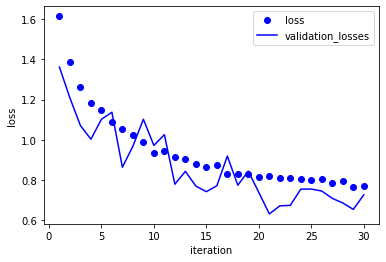

In [14]:
# Plot Losses VS Iteration
history_dict = history_augmentation.history
epochs = range(1,len(history_dict['loss'])+1)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(epochs,history_dict['loss'],'bo',label = "loss")
plt.plot(epochs,history_dict['val_loss'],'b',label = "validation_losses")
plt.legend()
plt.show()

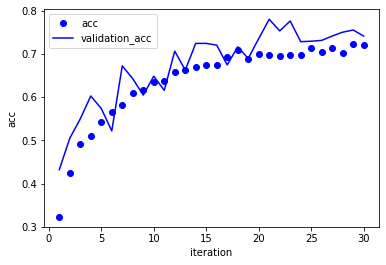

In [15]:
# Plot acc VS Iteration
epochs = range(1,len(history_dict['acc'])+1)
plt.xlabel('iteration')
plt.ylabel('acc')
plt.plot(epochs,history_dict['acc'],'bo',label = "acc")
plt.plot(epochs, history_dict['val_acc'],'b',label = "validation_acc")
plt.legend()
plt.show()

In [16]:
loss, acc= model.evaluate(test_generator)

150/150 [==============================] - 5s 36ms/step - loss: 0.7453 - acc: 0.7367
